# Customer Churn Analysis – IBM Telco Dataset

**Objective:**  
Analyze customer churn patterns for a fictional telecom company using Python.  
Identify high-risk customers and provide actionable insights to reduce churn.

**Dataset Overview:**
IBM Telco Customer Churn dataset with 7043 customers and 33 variables.  
Contains demographic info, tenure, contract type, monthly charges, and churn labels.


## Step 1: Import Libraries

We will import essential libraries for data analysis and visualization:
- `pandas` & `numpy` for data manipulation
- `matplotlib` & `seaborn` for visualization


In [1]:
# ===============================
# Step 1: Import Libraries
# ===============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: nicer plots
sns.set(style='whitegrid', palette='muted')


## Step 2: Load Dataset

Load the Excel dataset into a pandas DataFrame and inspect the first few rows.


In [2]:
# ===============================
# Step 2: Load Dataset
# ===============================
df = pd.read_excel("Customer_churn.xlsx")  
print("Dataset loaded successfully.")

# Quick look
df.head()


Dataset loaded successfully.


,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


## Step 3: Initial Data Understanding

Check dataset information:
- Number of rows and columns
- Data types
- Missing values


In [9]:
# ===============================
# Step 3: Initial Data Understanding
# ===============================

# Dataset info and missing values
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

## Step 4: Data Cleaning

- Convert `Total Charges` to numeric
- Handle missing values
  


In [7]:
# ===============================
# Step 4: Data Cleaning
# ===============================

# Convert 'Total Charges' to numeric
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')

# Fill missing 'Total Charges' with median
df['Total Charges'] = df['Total Charges'].fillna(df['Total Charges'].median())



## Step 5: Feature Engineering

- Convert churn label to a binary variable (`churn_flag`)
- Create tenure groups (`tenure_group`) to categorize customer tenure


In [10]:
# ===============================
# Step 5: Feature Engineering
# ===============================

# Convert 'Churn Label' to binary
df['churn_flag'] = np.where(df['Churn Label'] == 'Yes', 1, 0)

# Create tenure groups
df['tenure_group'] = pd.cut(
    df['Tenure Months'],
    bins=[0, 12, 24, 48, 72],
    labels=['0-1 yr', '1-2 yr', '2-4 yr', '4+ yr']
)


## Step 6: Exploratory Data Analysis (EDA)

- Compute summary statistics
- Calculate overall churn rate


In [12]:
# ===============================
# Step 6: Exploratory Data Analysis (EDA)
# ===============================

# Summary statistics
df.describe()


,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Total Charges,Churn Value,Churn Score,CLTV,churn_flag
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,2281.916928,0.265370,58.699418,4400.295755,0.265370
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,2265.270398,0.441561,21.525131,1183.057152,0.441561
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,18.800000,0.000000,5.000000,2003.000000,0.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,402.225000,0.000000,40.000000,3469.000000,0.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,1397.475000,0.000000,61.000000,4527.000000,0.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,3786.600000,1.000000,75.000000,5380.500000,1.000000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,8684.800000,1.000000,100.000000,6500.000000,1.000000


In [13]:
# Overall churn rate
churn_percentage = df['churn_flag'].mean() * 100
print(f"Overall churn rate: {churn_percentage:.2f}%")

Overall churn rate: 26.54%


## Step 7: Visual Analysis of Churn

- Churn rate by contract type
- Churn rate by tenure group
- Monthly charges vs churn


## Churn Rate by Contract Type

This analysis compares churn percentage across different customer contract types
to identify which contracts are more likely to churn.


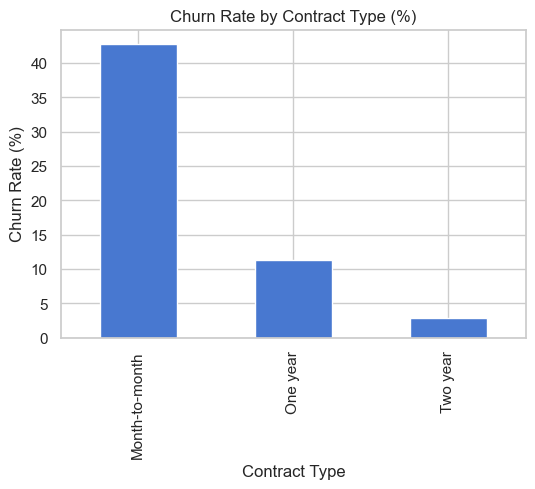

In [14]:
contract_churn = df.groupby('Contract')['churn_flag'].mean() * 100

plt.figure(figsize=(6,4))
contract_churn.plot(kind='bar')
plt.title("Churn Rate by Contract Type (%)")
plt.xlabel("Contract Type")
plt.ylabel("Churn Rate (%)")
plt.show()


## Churn Rate by Tenure Group

This analysis shows how customer churn changes based on the length of time
customers stay with the company.


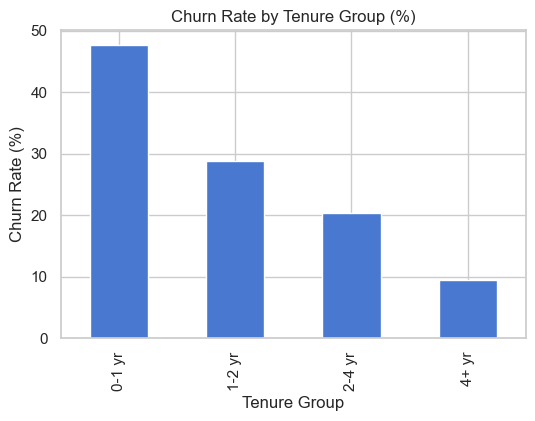

In [16]:
tenure_churn = (df.groupby('tenure_group', observed=True)['churn_flag'].mean() * 100)

plt.figure(figsize=(6,4))
tenure_churn.plot(kind='bar')
plt.title("Churn Rate by Tenure Group (%)")
plt.xlabel("Tenure Group")
plt.ylabel("Churn Rate (%)")
plt.show()


## Monthly Charges vs Churn

This analysis compares monthly charges between churned and retained customers
to understand whether higher billing amounts influence churn.


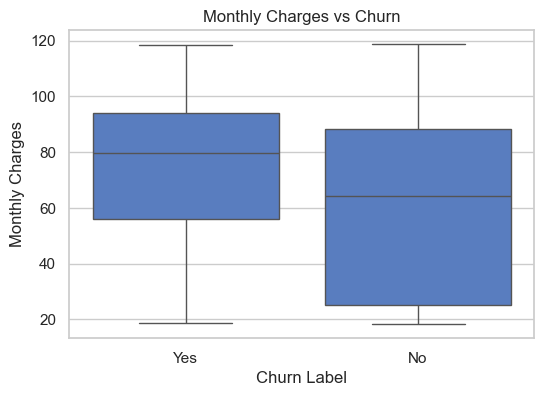

In [18]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Churn Label', y='Monthly Charges', data=df)
plt.title("Monthly Charges vs Churn")
plt.show()



## Step 8: Additional Analysis

- Average monthly charges by tenure group
- Identify patterns in customer spending


In [21]:
# Average monthly charges by tenure group
avg_charge_tenure = (df.groupby('tenure_group', observed=True)['Monthly Charges'].mean())

print("\nAverage Monthly Charges by Tenure Group:")
print(avg_charge_tenure)



Average Monthly Charges by Tenure Group:
tenure_group
0-1 yr    56.172023
1-2 yr    61.357275
2-4 yr    65.930552
4+ yr     73.945377
Name: Monthly Charges, dtype: float64


# 📊 Key Data-Driven Insights & Business Recommendations


### 1️⃣ Contract Type with Highest Churn
- Customers on the **Month-to-Month** contract show the **highest churn rate**.
- **Business Action:** Introduce loyalty incentives, discounts, or encourage customers to shift to long-term contracts.

In [31]:
# Contract with highest churn
highest_churn_contract = contract_churn.idxmax()
highest_churn_percent = contract_churn.max()
print(f"\n1. '{highest_churn_contract}' contract customers show highest churn: {highest_churn_percent:.2f}%. Action: Introduce loyalty incentives or longer-term plans.")


1. 'Month-to-month' contract customers show highest churn: 42.71%. Action: Introduce loyalty incentives or longer-term plans.


### 2️⃣ Tenure Group with Highest Churn Risk
- Customers in the **0–1 year tenure group** experience the **highest churn risk**.
- **Business Action:** Improve onboarding experience, provide welcome offers, and proactive support during the first year.

In [38]:
# Tenure group with highest churn

highest_churn_tenure = tenure_churn.idxmax()
highest_churn_tenure_percent = tenure_churn.max()
print(f"2. Customers in tenure group '{highest_churn_tenure}' have highest churn risk: {highest_churn_tenure_percent:.2f}%. Action: Target first-year customers with onboarding campaigns.")


2. Customers in tenure group '0-1 yr' have highest churn risk: 47.68%. Action: Target first-year customers with onboarding campaigns.


### 3️⃣ Impact of Monthly Charges on Churn
- Customers who churn have **higher average monthly charges** compared to retained customers.
- **Business Action:** Offer flexible pricing, personalized bundles, or targeted discounts to high-paying customers.


In [37]:
# Monthly charges effect

avg_monthly_churned = df[df['churn_flag']==1]['Monthly Charges'].mean()
avg_monthly_stayed = df[df['churn_flag']==0]['Monthly Charges'].mean()
print(f"3. Average monthly charges for churned customers: ${avg_monthly_churned:.2f}, vs ${avg_monthly_stayed:.2f} for retained customers. Action: Offer flexible payment options for high-paying customers.")


3. Average monthly charges for churned customers: $74.44, vs $61.27 for retained customers. Action: Offer flexible payment options for high-paying customers.


### 4️⃣ Long-Tenure Customers Are Most Stable
- Customers with **longer tenure** show the **lowest churn rates**.
- **Business Action:** Reward loyalty through exclusive benefits, retention offers, and premium upgrades.


In [39]:
# Long-tenure customers (lowest churn)

lowest_churn_tenure = tenure_churn.idxmin()
lowest_churn_percent = tenure_churn.min()
print(f"4. Long-tenure customers ({lowest_churn_tenure}) are most stable with churn rate {lowest_churn_percent:.2f}%. Action: Reward loyalty through special offers or upselling.")


4. Long-tenure customers (4+ yr) are most stable with churn rate 9.51%. Action: Reward loyalty through special offers or upselling.


### 5️⃣ Payment Method Influence on Churn
- Certain payment methods show **higher churn rates** compared to others.
- **Business Action:** Encourage stable payment options such as auto-pay by offering small discounts or rewards.


In [40]:
# Payment method impact

payment_churn = df.groupby('Payment Method')['churn_flag'].mean() * 100
highest_payment_churn = payment_churn.idxmax()
highest_payment_churn_percent = payment_churn.max()
print(f"5. Customers using '{highest_payment_churn}' payment method have highest churn: {highest_payment_churn_percent:.2f}%. Action: Simplify or incentivize preferred payment methods.")


5. Customers using 'Electronic check' payment method have highest churn: 45.29%. Action: Simplify or incentivize preferred payment methods.


## ✅ Conclusion
This analysis identifies high-risk churn segments and converts analytical findings into **actionable business strategies** that can help reduce customer churn and improve long-term customer retention.